# Author - TWINKLE JAIN

## The Sparks Foundation GRIP, MAY21

## TASK 2 - Prediction using Unsupervised Machine Learning

### TASK Statement -From the given ‘Iris’ dataset, predict the optimum number of clusters and represent them visually.

## Importing Relevant Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Dataset

In [4]:
iris = pd.read_csv("C:\\Users\\Twinkle Jain\\Downloads\\Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring the Dataset

In [10]:
## Columns of the dataset
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
## Now we look at some descriptive statistics of the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### There is no null values in the dataset.

## Finding the optimal number of clusters

### THE ELBOW METHOD

In [12]:
from sklearn.cluster import KMeans

In [13]:
x=iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y=iris['Species'].values

In [14]:
Range=range(1,10)

In [15]:
Sum_of_squared_errors=[]

In [16]:
for i in Range:
    km=KMeans(n_clusters=i)
    km.fit(x)
    Sum_of_squared_errors.append(km.inertia_)

Text(0, 0.5, 'SSE')

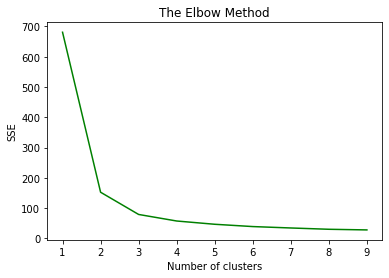

In [27]:
## Plotting number of clusters on the graph to determine the optimal number of clusters
plt.plot(range(1,10), Sum_of_squared_errors, color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

#### As shown in the plot above, after 3 clusters the decrease in within cluster sum of squares is very low, so adding more clusters wouldn't have any further benefit. So, the optimal number of clusters is 3. 

## Performing Clustering with number of clusters k = 3

In [17]:
kmeans_3=KMeans(n_clusters=3)

In [18]:
kmeans_3.fit(x)

KMeans(n_clusters=3)

In [30]:
print(kmeans_3.cluster_centers_)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [19]:
predicted_clusters=kmeans_3.fit_predict(x)

In [32]:
predicted_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Visualizing the Clusters

Text(0.5, 1.0, 'Cluster Diagram')

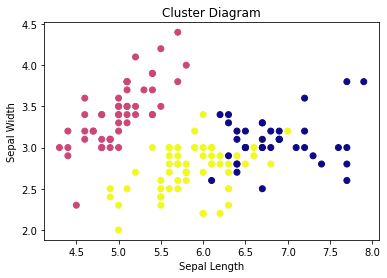

In [21]:
plt.scatter(x[:,0],x[:,1],c=predicted_clusters,cmap='plasma')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Cluster Diagram')